In [150]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [198]:
class LabelPropagation:
    def __init__(self, adj_matrix, labels):
        self.norm_adj_matrix = self.matnorm(adj_matrix)
        self.n_nodes = adj_matrix.shape[0]
        self.labels_unwrapped = None 
        self.n_cats = int(np.max(labels) + 1)
        self.labels = labels
        self.predictions = None
    
    '''calculating the matrix we want to multiply with in the algorithm'''
    def matnorm(self, adj_matrix):
        deg = adj_matrix.sum(axis=1)
        deg[deg == 0] = 1
        return adj_matrix/deg[:, None]
    
    '''implementing the label propagation step'''
    def labprop(self):
        self.predictions = np.matmul(self.norm_adj_matrix, self.predictions)
        self.predictions[self.labels>0, :] = 0
        self.predictions[self.labels>0, self.labels[self.labels>0].astype(int)] = 1
        self.predictions[self.labels==0, :] = 0
        self.predictions[self.labels==0, self.labels[self.labels==0].astype(int)] = 1

    def unwrap(self, labels):
        self.labels_unwrapped = np.zeros((self.n_nodes, self.n_cats))
        self.labels_unwrapped[np.nonzero(labels), labels[np.nonzero(labels)].astype(int)] = 1
        self.labels_unwrapped[labels==-1, :] = 0
        self.labels_unwrapped[labels==0, labels[labels==0].astype(int)] = 1

    def fit(self, labels, max_iter, error):
        self.unwrap(labels)
        self.predictions = np.copy(self.labels_unwrapped)
        prevstep = np.zeros((self.n_nodes, self.n_cats))
        for i in tqdm(range(max_iter)):
            dif = np.sum(np.absolute(self.predictions-prevstep))
            if dif < error:
                print(f"The method stopped after {i} iterations with error={dif:.4f}.")
                break
            prevstep = np.copy(self.predictions)
            self.labprop()

    def prediction(self):
        return np.argmax(label_propagation.predictions, axis=1)

In [199]:
# Create caveman graph
n_cliques = 4
size_cliques = 10
caveman_graph = nx.connected_caveman_graph(n_cliques, size_cliques)
adj_matrix = nx.adjacency_matrix(caveman_graph).toarray()

# Create labels
labels = np.full(n_cliques * size_cliques, -1.)

# Only one node per clique is labeled. Each clique belongs to a different class.
labels[0] = 0
labels[size_cliques] = 1
labels[size_cliques * 2] = 2
labels[size_cliques * 3] = 3
labels[np.nonzero(labels)].astype(int)

C:\Users\samue\AppData\Local\Temp\ipykernel_7660\3643551203.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(caveman_graph).toarray()


array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1])

In [203]:
label_propagation = LabelPropagation(adj_matrix, labels)
label_propagation.unwrap(labels)
label_propagation.fit(labels, 1000, 1e-3)
label_propagation_output_labels = label_propagation.prediction()



  7%|▋         | 73/1000 [00:00<00:00, 4563.71it/s]

The method stopped after 73 iterations with error=0.0010.
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]


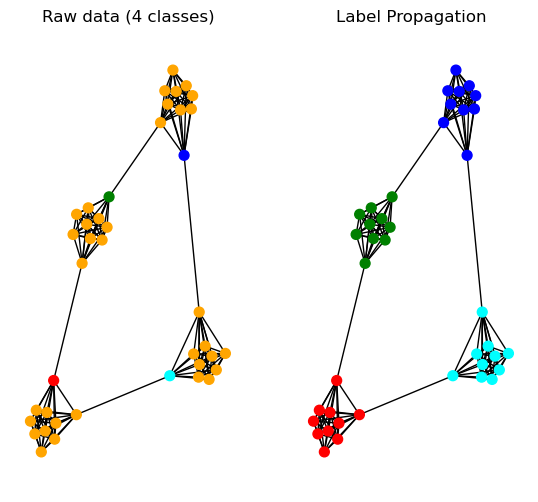

In [204]:
# Plot graphs
color_map = {-1: "orange", 0: "blue", 1: "green", 2: "red", 3: "cyan"}
input_labels_colors = [color_map[l] for l in labels]
lprop_labels_colors = [color_map[l] for l in label_propagation_output_labels]

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 4, 1)
ax2 = plt.subplot(1, 4, 2)


ax1.title.set_text("Raw data (4 classes)")
ax2.title.set_text("Label Propagation")


pos = nx.spring_layout(caveman_graph)
nx.draw(caveman_graph, ax=ax1, pos=pos, node_color=input_labels_colors, node_size=50)
nx.draw(caveman_graph, ax=ax2, pos=pos, node_color=lprop_labels_colors, node_size=50)

plt.show()